In [1]:
import os
def savefig(fig, name):
    if not os.path.exists('images'):
        os.makedirs('images')
    fig.savefig('images/' + name + '.png')

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Linear Regression

In [2]:
import numpy as np

np.random.seed(42)
m = 100 # the number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

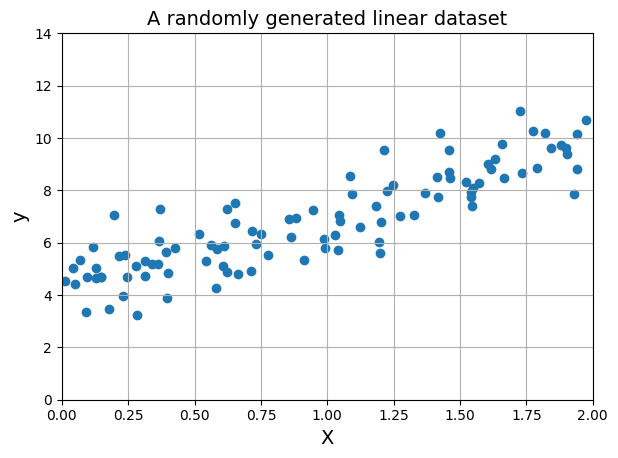

In [3]:
plt.scatter(X, y)
plt.title('A randomly generated linear dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([0, 2, 0, 14])
plt.tight_layout()
plt.grid()
savefig(plt, 'linear_dataset')
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature
# using the normal equation
X_b = add_dummy_feature(X) # add x_0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

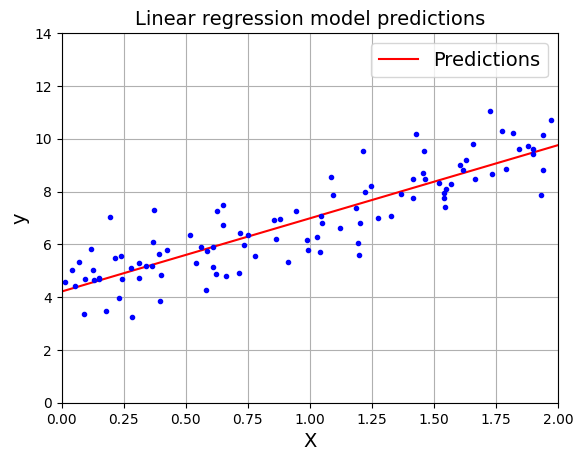

In [7]:
plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')
plt.grid()
plt.title('Linear regression model predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([0, 2, 0, 14])
plt.legend()
savefig(plt, 'linear_model_predictions')
plt.show()

In [8]:
# using Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [11]:
# using the pseudoinverse
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient Descent

In [12]:
eta = 0.1 # learning rate
n_epochs = 1000  # number of epochs
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

In [13]:
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

In [15]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path


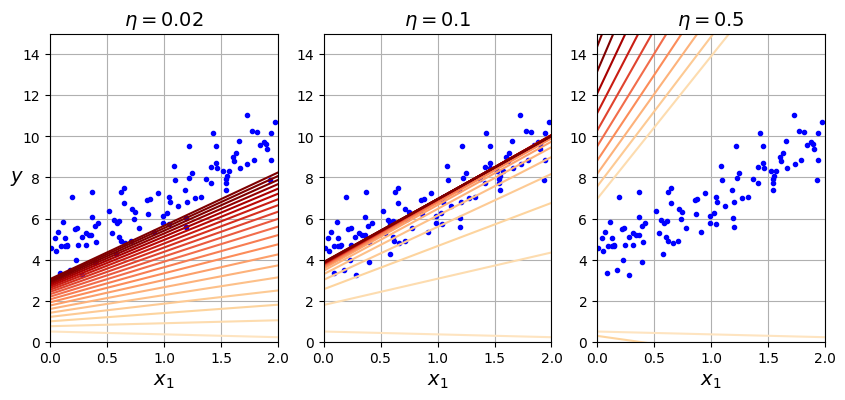

In [16]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.subplot(133)
plot_gradient_descent(theta, eta = 0.5)
savefig(plt, "three different learning rates")
plt.show()

## Stochastic Gradient Descent

In [17]:
np.random.randint(100)

71

In [18]:
n_epochs = 50
t_0, t_1 = 5, 50 # learning rate schedule

def learning_schedule(t):
    return t_0 / (t + t_1) 

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        x_i = X_b[random_index : random_index + 1]
        y_i = y[random_index : random_index + 1]
        gradients = 2 * x_i.T @ (x_i @ theta - y_i) # ony one instances
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [19]:
theta_path_sgd = []

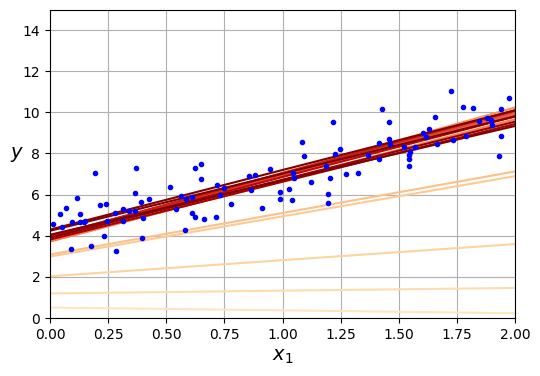

In [20]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20
plt.figure(figsize=(6, 4))

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
savefig(plt, "sgd_plot")
plt.show()

### Use SGD from Scikit-learn

In [21]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01, n_iter_no_change = 100, random_state = 42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-Batch Gradient Descent

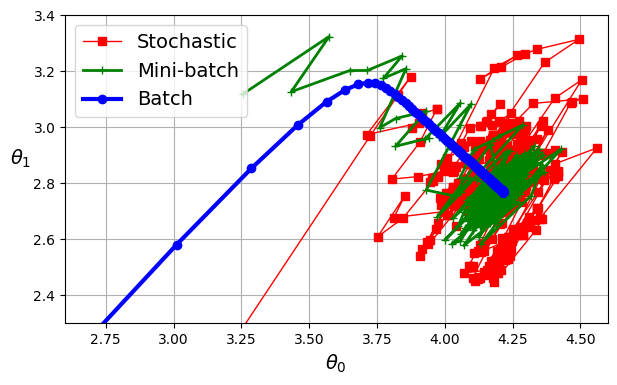

In [23]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
savefig(plt, "gradient_descent_paths_plot")
plt.show()

## Polynomial Regression

In [24]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

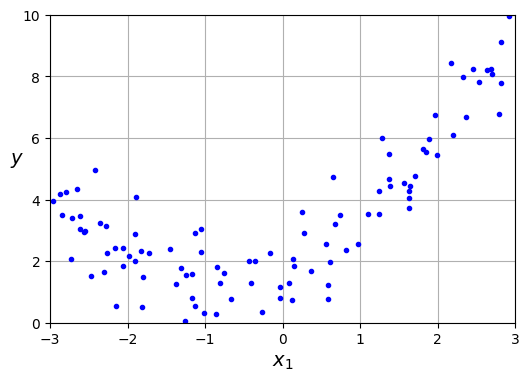

In [25]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.grid()
plt.axis([-3, 3, 0, 10])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
savefig(plt, "polynomial_points")
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [27]:
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

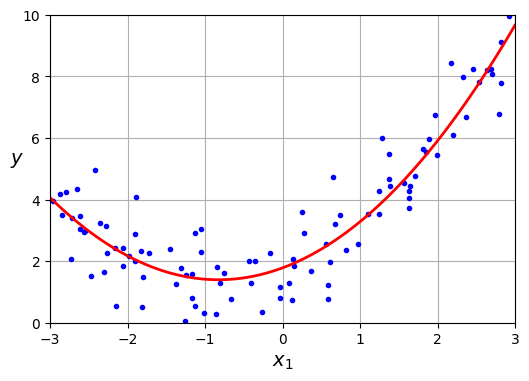

In [30]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = 'Predictions')
plt.grid()
plt.axis([-3, 3, 0, 10])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
savefig(plt, "polynomial_prediction_line")
plt.show()

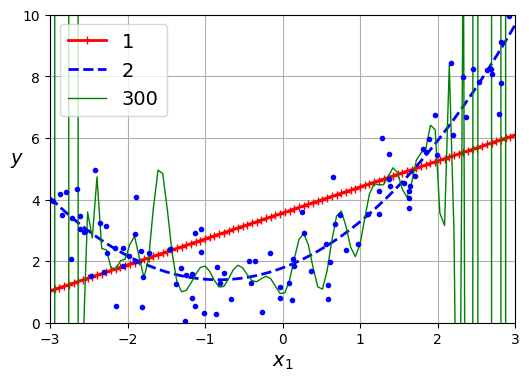

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    sc = StandardScaler()
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, sc, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, linewidth=width, label=f"{degree}")

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
savefig(plt, "polynomial_predictions_plot")
plt.show()

### Learning Curve

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv = 5, 
    scoring = "neg_root_mean_squared_error"
)

train_errors = - train_scores.mean(axis = 1)
valid_errors = - valid_scores.mean(axis = 1)

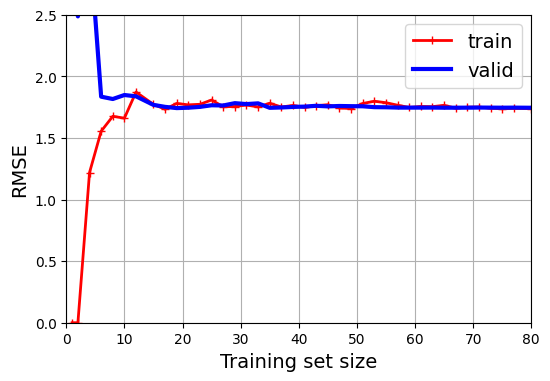

In [33]:
plt.figure(figsize = (6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = "valid")
plt.legend()
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.xlabel("Training set size")
plt.ylabel("RMSE")
savefig(plt, 'underfitting_learning_curve')
plt.show()

In [34]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree = 10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv = 5,
    scoring = "neg_root_mean_squared_error"
)

train_errors = - train_scores.mean(axis = 1)
valid_errors = - valid_scores.mean(axis = 1)

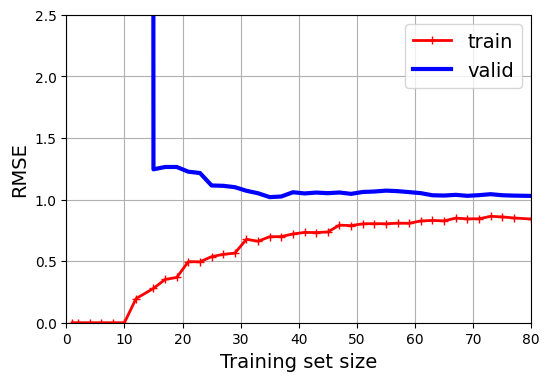

In [35]:
plt.figure(figsize = (6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth = 2, label = "train")
plt.plot(train_sizes, valid_errors, "b-", linewidth = 3, label = "valid")
plt.legend()
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.xlabel("Training set size")
plt.ylabel("RMSE")
savefig(plt, 'overfitting_learning_curve')
plt.show()

## Regularized Linear Model

In [36]:
# generate the data
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

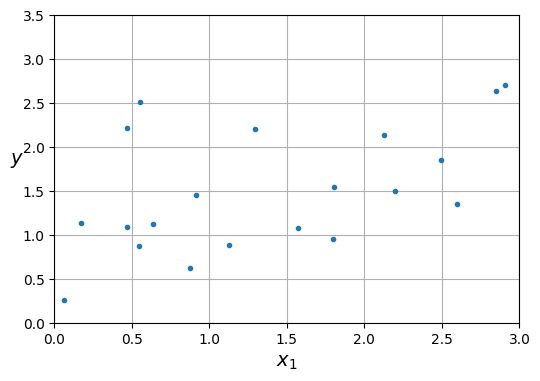

In [37]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [39]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, ".")
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree = 10, include_bias = False),
                StandardScaler(),
                model
            )
        model.fit(X, y)
        y_new_regu = model.predict(X_new)
        plt.plot(X_new, y_new_regu, style, linewidth = 2, label = fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

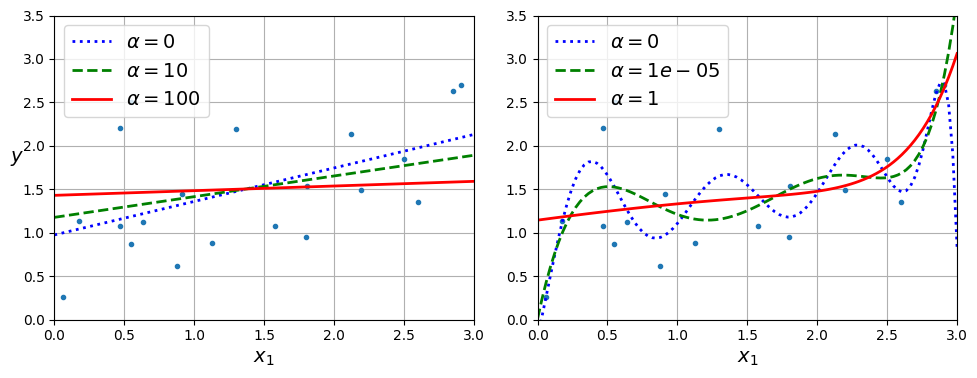

In [40]:
plt.figure(figsize = (10, 4))
plt.subplot(121)
plot_model(Ridge, polynomial = False, alphas = [0, 10, 100], random_state = 42)
plt.ylabel("$y$", rotation = 0)
plt.subplot(122)
plot_model(Ridge, polynomial = True, alphas = [0, 10**-5, 1], random_state = 42)
plt.tight_layout()
savefig(plt, 'ridge_regression_plot')
plt.show()

In [41]:
sgd_reg = SGDRegressor(penalty = 'l2', alpha = 0.1/m, tol = None, max_iter = 1000, eta0 = 0.01, random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

## Lasso Regression

In [42]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

/home/thangquang/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


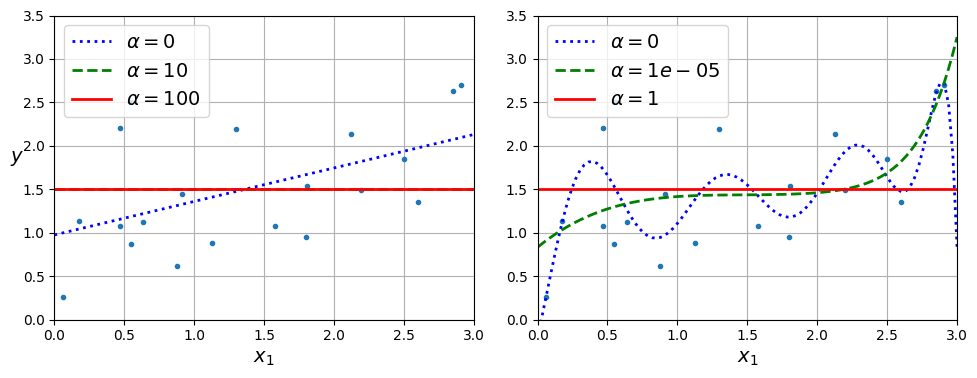

In [43]:
plt.figure(figsize = (10, 4))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas = [0, 10, 100], random_state = 42)
plt.ylabel("$y$", rotation = 0)
plt.subplot(122)
plot_model(Lasso, polynomial = True, alphas = [0, 10**-5, 1], random_state = 42)
plt.tight_layout()
savefig(plt, 'lasso_regression_plot')
plt.show()

In [44]:
sgd_reg = SGDRegressor(alpha = 0.1, penalty = "l1", max_iter = 1000, eta0 = 0.01, random_state=42, tol = None)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.53728962])

## Elastic Net Regression

In [45]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5) # l1_ratio is r ratio
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

In [46]:
# recreate quadratic data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [47]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

rmse_vals = []
rmse_trains = []
preprocessing = make_pipeline(
    PolynomialFeatures(degree = 90, include_bias = False),
    StandardScaler()
)
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty = None, eta0 = 0.002, random_state = 42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_prediction = sgd_reg.predict(X_valid_prep)
    y_train_predict = sgd_reg.predict(X_train_prep)
    rmse_train = mean_squared_error(y_train, y_train_predict)
    rmse_val = mean_squared_error(y_valid, y_valid_prediction)
    rmse_vals.append(rmse_val)
    rmse_trains.append(rmse_train)
    if rmse_val < best_valid_rmse:
        best_valid_rmse = rmse_val
        best_model = deepcopy(sgd_reg)

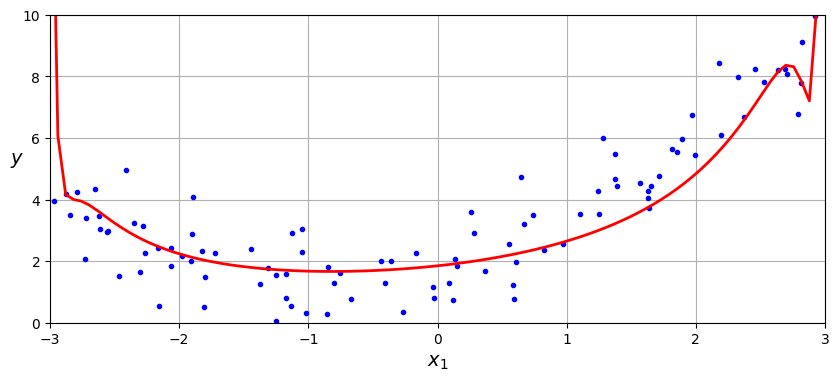

In [48]:
plt.figure(figsize=(10, 4))
plt.plot(X, y, 'b.')
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = preprocessing.transform(X_new)
y_new = best_model.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = 'Predictions')
plt.grid()
plt.axis([-3, 3, 0, 10])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
savefig(plt, "early_stopping_prediction_line")
plt.show()

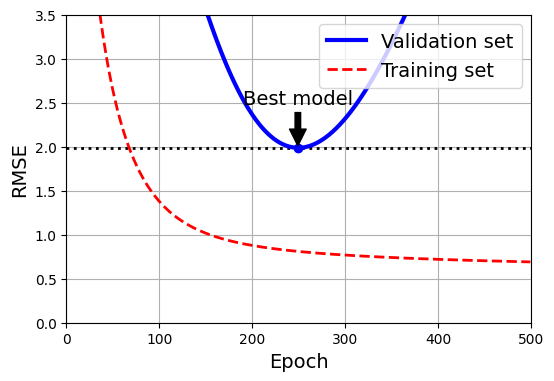

In [49]:
best_epoch = np.argmin(rmse_vals)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(rmse_vals, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(rmse_trains, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
savefig(plt, "early_stopping_plot_best_model")
plt.show()

## Logistic Regression

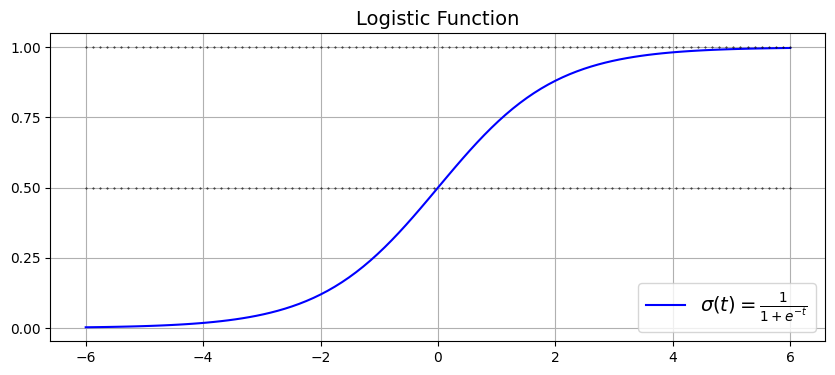

In [77]:
plt.figure(figsize=(10,4))
x_bar = np.linspace(-6, 6, 100)
sigmoid = 1 / (1 + np.exp(-x_bar))
plt.plot(x_bar, sigmoid, "b-", label = r"$\sigma({t}) = \frac{1}{1 + e^{-t}}$")
line_50 = [0.5] * 100
line_100 = [1] * 100
plt.plot(x_bar, line_50, "k.", markersize = 0.8)
plt.plot(x_bar, line_100, "k.", markersize = 0.8)
plt.legend()
plt.grid()
plt.yticks([0, 0.25, 0.50, 0.75, 1.00])
plt.title("Logistic Function")
savefig(plt, "logistic_function")
plt.show()

### Decision Boundaries

In [78]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [79]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [80]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [ ]:
iris.target_names